<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/autoencoder_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
42/42 - 2s - loss: 0.2115 - val_loss: 0.1730
Epoch 2/200
42/42 - 0s - loss: 0.0343 - val_loss: 0.0948
Epoch 3/200
42/42 - 0s - loss: 0.0216 - val_loss: 0.0512
Epoch 4/200
42/42 - 0s - loss: 0.0179 - val_loss: 0.0295
Epoch 5/200
42/42 - 0s - loss: 0.0155 - val_loss: 0.0191
Epoch 6/200
42/42 - 0s - loss: 0.0136 - val_loss: 0.0135
Epoch 7/200
42/42 - 0s - loss: 0.0133 - val_loss: 0.0125
Epoch 8/200
42/42 - 0s - loss: 0.0123 - val_loss: 0.0094
Epoch 9/200
42/42 - 0s - loss: 0.0117 - val_loss: 0.0092
Epoch 10/200
42/42 - 0s - loss: 0.0114 - val_loss: 0.0071
Epoch 11/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0065
Epoch 12/200
42/42 - 0s - loss: 0.0095 - val_loss: 0.0054
Epoch 13/200
42/42 - 0s - loss: 0.0095 - val_loss: 0.0068
Epoch 14/200
42/42 - 0s - loss: 0.0094 - val_loss: 0.0059
Epoch 15/200
42/42 - 0s - loss: 0.0089 - val_loss: 0.0046
Epoch 16/200
42/42 - 0s - loss: 0.0083 - val_loss: 0.0061
Epoch 17/200
42/42 - 0s - loss: 0.0081 - val_loss: 0.0051
Epoch 18/200
42/42 - 0s

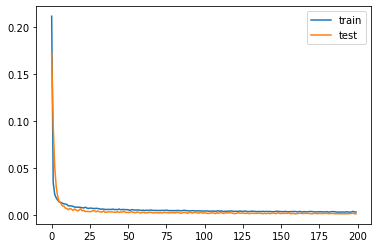

In [3]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)

# number of input columns
n_inputs = X.shape[1]

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model = Model(inputs=visible, outputs=output)

# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

# save the encoder to file
encoder.save('encoder.h5')

In [5]:
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
